### Impact of time averaging on spatial scales 


In [12]:
import xarray as xr
from xmitgcm import open_mdsdataset
from matplotlib import pyplot as plt
import numpy as np
from xgcm import Grid
import xrft

%matplotlib inline

In [3]:
ds_dir = '/swot/SUM04/dbalwada/channel_model/05km_sponge/run_tracers_restored_3day_output/run_tracers_restored/'

In [4]:
ds = xr.open_zarr('/swot/SUM04/dbalwada/channel_model/05km_sponge/run_tracers_restored_3day_output/run_tracers_restored_zarr/')

In [158]:
data_dir = '/swot/SUM04/dbalwada/channel_model/05km_sponge/run_tracers_restored/'

model_vars = ['uVeltave','vVeltave','wVeltave', 'Ttave', 
             'UTtave', 'VTtave','WTtave','UUtave', 'UVtave', 'VVtave', 'TTtave', 'ETAtave']
ds_model = open_mdsdataset(data_dir , delta_t=300,  
                          prefix=model_vars,
                          ignore_unknown_vars=True, geometry='cartesian')

model_vars = ['tracer1_diag', 'tracer2_diag', 'tracer3_diag', 'tracer4_diag', 'tracer5_diag',
              'tracer6_diag', 'tracer7_diag', 'tracer8_diag', 'tracer9_diag', 'tracer10_diag',
              'tracer11_diag', 'tracer12_diag', 'tracer13_diag', 'tracer14_diag', 'tracer15_diag',
              'tracer16_diag', 'tracer17_diag', 'tracer18_diag', 'tracer19_diag', 'tracer20_diag',]
ds_tracers = open_mdsdataset(data_dir , delta_t=300,  
                          prefix=model_vars,
                          ignore_unknown_vars=True, geometry='cartesian')

ds_tav = xr.merge([ds_model, ds_tracers])

In [172]:
ds_tav = ds_tav.isel(time=slice(68,110)) # select only last 20 year data

### Impact of time filter on spatial scales

In [28]:
T_mean = ds['T'].mean('time')
C_mean = ds['PTRACER01'].mean('time')

In [29]:
T_mean.load();
C_mean.load();

<xarray.DataArray 'T' (Z: 40, YC: 400, XC: 400)>
dask.array<mean_agg-aggregate, shape=(40, 400, 400), dtype=float32, chunksize=(1, 400, 400), chunktype=numpy.ndarray>
Coordinates:
    Depth    (YC, XC) float32 dask.array<chunksize=(400, 400), meta=np.ndarray>
    PHrefC   (Z) float32 dask.array<chunksize=(1,), meta=np.ndarray>
  * XC       (XC) float32 2.5e+03 7.5e+03 1.25e+04 ... 1.992e+06 1.998e+06
  * YC       (YC) float32 2.5e+03 7.5e+03 1.25e+04 ... 1.992e+06 1.998e+06
  * Z        (Z) float32 -5.0 -15.0 -25.0 ... -2.728e+03 -2.83e+03 -2.934e+03
    drF      (Z) float32 dask.array<chunksize=(1,), meta=np.ndarray>
    hFacC    (Z, YC, XC) float32 dask.array<chunksize=(1, 400, 400), meta=np.ndarray>
    maskC    (Z, YC, XC) bool dask.array<chunksize=(1, 400, 400), meta=np.ndarray>
    rA       (YC, XC) float32 dask.array<chunksize=(400, 400), meta=np.ndarray>

In [173]:
Ttave_mean = ds_tav['Ttave'].mean('time')
Ctave_mean = ds_tav['TRAC01'].mean('time')
Ttave_mean.load();
Ctave_mean.load();

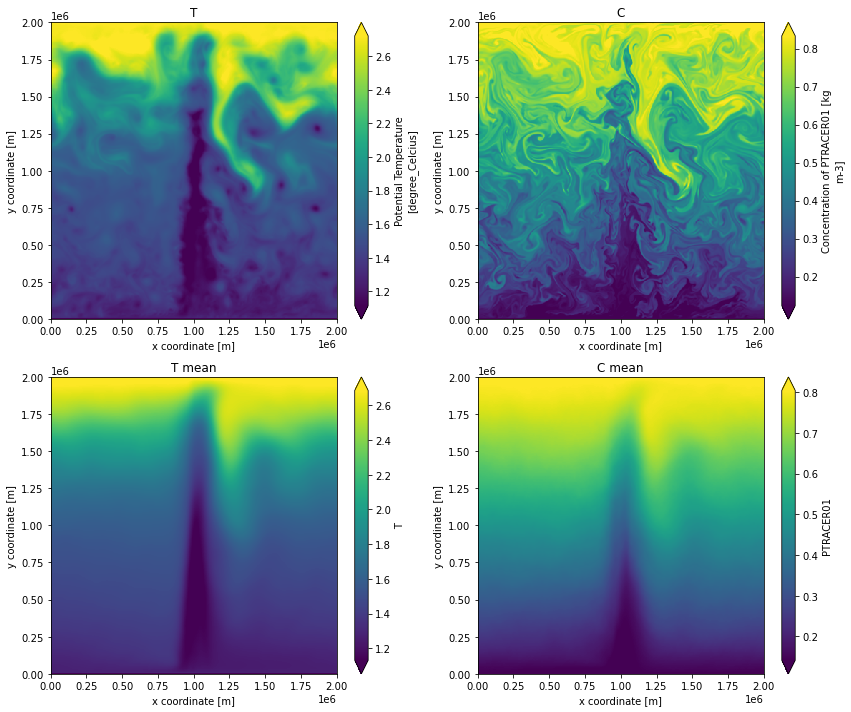

In [34]:
plt.figure(figsize=(12, 10))

plt.subplot(221)
ds['T'].isel(time=0).sel(Z=-1000, method='nearest').plot(robust=True)
plt.title('T')

plt.subplot(222)
ds['PTRACER01'].isel(time=0).sel(Z=-1000, method='nearest').plot(robust=True)
plt.title('C')

plt.subplot(223)
T_mean.sel(Z=-1000, method='nearest').plot(robust=True)
plt.title('T mean')

plt.subplot(224)
C_mean.sel(Z=-1000, method='nearest').plot(robust=True)
plt.title('C mean')

plt.tight_layout()

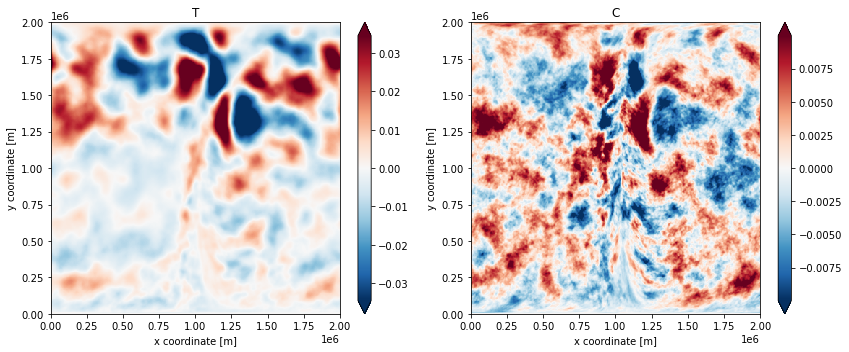

In [174]:
plt.figure(figsize=(12, 5))

plt.subplot(121)
(Ttave_mean - T_mean).sel(Z=-1000, method='nearest').plot(robust=True)
plt.title('T')

plt.subplot(122)
(Ctave_mean - C_mean).sel(Z=-1000, method='nearest').plot(robust=True)
plt.title('C')


plt.tight_layout()

# We can't do a pointwise comparison because the fields are over distinct time

In [175]:
T_ps_x = xrft.power_spectrum(ds['T'].drop(['Depth', 'hFacC', 'maskC', 'rA']), dim=['XC']).rename('T_ps')
C_ps_x = xrft.power_spectrum(ds['PTRACER01'].drop(['Depth', 'hFacC', 'maskC', 'rA']), dim=['XC']).rename('C_ps')

Tmean_ps_x = xrft.power_spectrum(T_mean.drop(['Depth', 'hFacC', 'maskC', 'rA']), dim=['XC']).rename('T_ps')
Cmean_ps_x = xrft.power_spectrum(C_mean.drop(['Depth', 'hFacC', 'maskC', 'rA']), dim=['XC']).rename('C_ps')

Ttavemean_ps_x = xrft.power_spectrum(Ttave_mean.drop(['Depth', 'hFacC', 'maskC', 'rA']), dim=['XC']).rename('T_ps')
Ctavemean_ps_x = xrft.power_spectrum(Ctave_mean.drop(['Depth', 'hFacC', 'maskC', 'rA']), dim=['XC']).rename('C_ps')

Text(0.5, 0, 'k [1/m]')

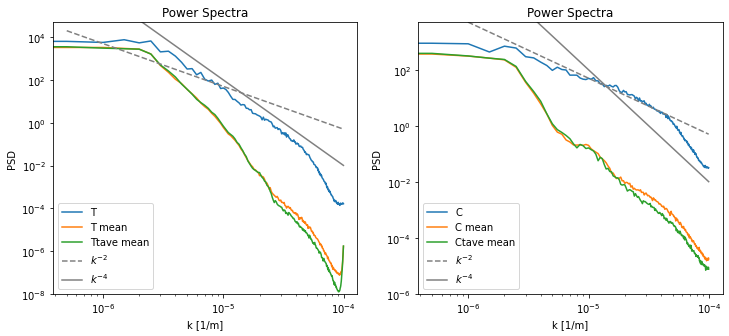

In [291]:
plt.figure(figsize=(12, 5))

plt.subplot(121)
T_ps_x.isel(time=0).sel(Z=-1000, method='nearest'
                       ).sel(YC=slice(100e3, 1900e3)).mean('YC').plot(label='T')
Tmean_ps_x.sel(Z=-1000, method='nearest'
                       ).sel(YC=slice(100e3, 1900e3)).mean('YC').plot(label='T mean')
Ttavemean_ps_x.sel(Z=-1000, method='nearest'
                       ).sel(YC=slice(100e3, 1900e3)).mean('YC').plot(label='Ttave mean')

k= T_ps_x.freq_XC

plt.plot(k, 5e-9*k**-2, '--', color='gray', label=r'$k^{-2}$')
plt.plot(k, 1e-18*k**-4, '-', color='gray', label=r'$k^{-4}$')

plt.xscale('log')
plt.yscale('log')

plt.ylim([1e-8, 5e4])
plt.legend()

plt.title('Power Spectra')
plt.ylabel('PSD')
plt.xlabel('k [1/m]')

plt.subplot(122)
C_ps_x.isel(time=0).sel(Z=-1000, method='nearest'
                       ).sel(YC=slice(100e3, 1900e3)).mean('YC').plot(label='C')
Cmean_ps_x.sel(Z=-1000, method='nearest'
                       ).sel(YC=slice(100e3, 1900e3)).mean('YC').plot(label='C mean')
Ctavemean_ps_x.sel(Z=-1000, method='nearest'
                       ).sel(YC=slice(100e3, 1900e3)).mean('YC').plot(label='Ctave mean')


k= T_ps_x.freq_XC

plt.plot(k, 5e-9*k**-2, '--', color='gray', label=r'$k^{-2}$')
plt.plot(k, 1e-18*k**-4, '-', color='gray', label=r'$k^{-4}$')

plt.xscale('log')
plt.yscale('log')

plt.ylim([1e-6, 5e3])
plt.legend()

plt.title('Power Spectra')
plt.ylabel('PSD')
plt.xlabel('k [1/m]')

### Impact of time average on eddy fluxes 

How quickly do the eddy fluxes converge? 

First lets look at what happens to a time series. 

In [106]:
T_series = ds['T'].sel(XC=1000e3, YC=1000e3, Z=-1000, method='nearest')
C_series = ds['PTRACER01'].sel(XC=1000e3, YC=1000e3, Z=-1000, method='nearest')
T_series.load();
C_series.load();

In [74]:
time = ((T_series.time - T_series.time[0])/1e9/3600/24).astype('float')

In [181]:
Ttave_series = ds_tav['Ttave'].sel(XC=1000e3, YC=1000e3, Z=-1000, method='nearest')
Ctave_series = ds_tav['TRAC01'].sel(XC=1000e3, YC=1000e3, Z=-1000, method='nearest')

time_tav = ((Ttave_series.time - Ttave_series.time[0])/1e9/24/3600).astype('float')

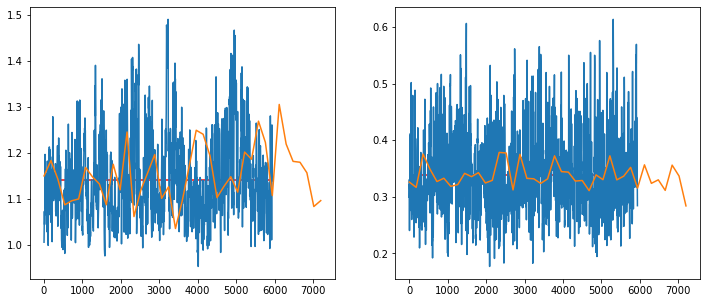

In [184]:
plt.figure(figsize=(12, 5))

plt.subplot(121)
plt.plot(time, T_series)
plt.plot(time_tav, Ttave_series)
plt.hlines(T_series.mean(), time[0], time[-1] , color='r')

plt.subplot(122)
plt.plot(time, C_series)
plt.plot(time_tav, Ctave_series)
plt.hlines(C_series.mean(), time[0], time[-1] , color='r')


In [185]:
dT_dt = T_series.diff('time') / time.diff('time')
dC_dt = C_series.diff('time') / time.diff('time')

dTtave_dt = Ttave_series.diff('time') / time_tav.diff('time')
dCtave_dt = Ctave_series.diff('time') / time_tav.diff('time')

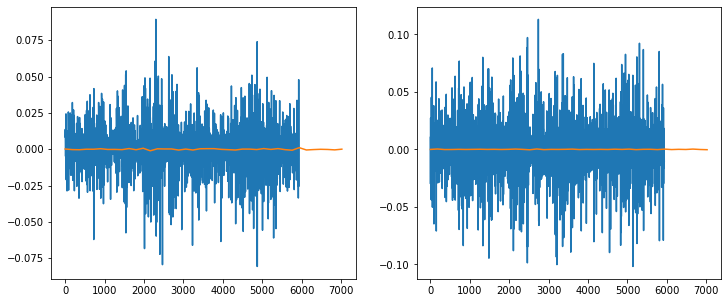

In [189]:
plt.figure(figsize= (12, 5))

plt.subplot(121)
plt.plot(time[0:-1], dT_dt)
plt.plot(time_tav[0:-1], dTtave_dt)

plt.subplot(122)
plt.plot(time[0:-1], dC_dt)
plt.plot(time_tav[0:-1], dCtave_dt)

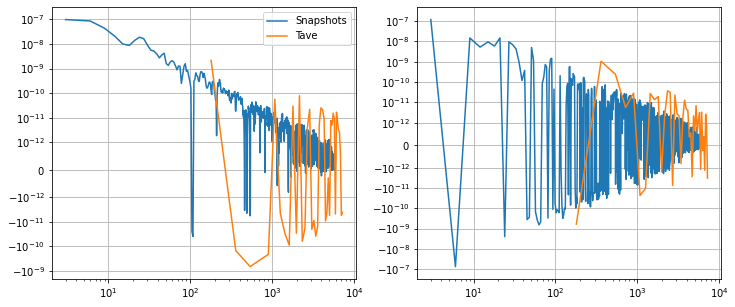

In [198]:
plt.figure(figsize=(12, 5))

plt.subplot(121)
# Take long time steps
#plt.plot(time , (T_series - T_series[0])/ time.cumsum()/24/3600 ) 
#plt.plot(time_tav , (Ttave_series - Ttave_series[0])/ time_tav.cumsum()/24/3600 ) 
# Mean of the tendency
plt.plot(time [1:] , dT_dt.cumsum()*3. / time[1:].cumsum()/24/3600 , label='Snapshots') 
plt.plot(time_tav [1:] , dTtave_dt.cumsum()*180. / time_tav[1:].cumsum()/24/3600 , label='Tave') 
plt.yscale('symlog', linthresh=1e-12)
plt.xscale('log')
plt.legend()
plt.grid()

plt.subplot(122)
#plt.plot(time , (C_series - C_series[0])/ time.cumsum()/24/3600 ) 
#plt.plot(time [1:] , dC_dt.cumsum()*3. / time[1:].cumsum()/24/3600 ) 

plt.plot(time [1:] , dC_dt.cumsum()*3. / time[1:].cumsum()/24/3600 ) 
plt.plot(time_tav [1:] , dCtave_dt.cumsum()*180. / time_tav[1:].cumsum()/24/3600 ) 
plt.yscale('symlog', linthresh=1e-12)
plt.xscale('log')
plt.grid()


The flux term

In [ ]:
import sys
sys.path.append('../../m2lines/channel-coarse-grain-pipeline/modules/')
import filter_coarsen_func as fcf # modu

import MITgcm_advection_schemes as MAS

In [250]:
T_flux = MAS.advection_scheme2(ds, flux_var='T')
T_flux['Fdiv'] = MAS.flux_div(T_flux)

C_flux = MAS.advection_scheme2(ds, flux_var='PTRACER01')
C_flux['Fdiv'] = MAS.flux_div(C_flux)

In [251]:
T_flux['Fx_mean'] = ds.U.mean('time') *grid.interp(T_mean, 'X') * ds_tav.dyG * ds_tav.drF * ds_tav.hFacW
T_flux['Fy_mean'] = ds.V.mean('time') *grid.interp(T_mean, 'Y', boundary='extend') * ds_tav.dxG * ds_tav.drF * ds_tav.hFacS
T_flux['Fz_mean'] = ds.W.mean('time') *grid.interp(T_mean, 'Z', boundary='extend') * ds_tav.rA 
T_flux['Fdiv_mean'] = MAS.flux_div(T_flux, flux_vars = ['Fx_mean', 'Fy_mean', 'Fz_mean'] )

In [252]:
T_flux_div_mean = T_flux['Fdiv'].sel(Z=-1000, method='nearest').mean('time')
T_flux_div_mean.load();

/home/dbalwada/.conda/envs/GM-Redi-offline-env/lib/python3.9/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))


In [253]:
T_mean_flux_div_mean = T_flux['Fdiv_mean'].sel(Z=-1000, method='nearest')
T_mean_flux_div_mean.load();

/home/dbalwada/.conda/envs/GM-Redi-offline-env/lib/python3.9/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))


In [155]:
C_flux_div_mean = C_flux_div.sel(Z=-1000, method='nearest').mean('time')
C_flux_div_mean.load();

/home/dbalwada/.conda/envs/GM-Redi-offline-env/lib/python3.9/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))


In [223]:
grid = Grid(ds_tav, periodic='X')

In [237]:
# fluxes from model with tav 

Ttave_flux = xr.Dataset()

Ttave_flux['Fx'] = ds_tav.UTtave * ds_tav.dyG * ds_tav.drF * ds_tav.hFacW
Ttave_flux['Fy'] = ds_tav.VTtave * ds_tav.dxG * ds_tav.drF * ds_tav.hFacS
Ttave_flux['Fz'] = ds_tav.WTtave * ds_tav.rA 

Ttave_flux = Ttave_flux.assign_coords(ds_tav.coords)
Ttave_flux['Fdiv'] = MAS.flux_div(Ttave_flux)


Ctave_flux = xr.Dataset()
Ctave_flux['Fx'] = ds_tav.UTRAC01 * ds_tav.dyG * ds_tav.drF * ds_tav.hFacW
Ctave_flux['Fy'] = ds_tav.VTRAC01 * ds_tav.dxG * ds_tav.drF * ds_tav.hFacS
# why is this W flux not on Zl?? 
Ctave_flux['Fz'] = grid.interp(ds_tav.WTRAC01, 'Z', boundary='extend') * ds_tav.rA  

Ctave_flux = Ctave_flux.assign_coords(ds_tav.coords)
Ctave_flux['Fdiv'] = MAS.flux_div(Ctave_flux)

In [239]:
Ttave_flux['Fx_mean'] = ds_tav.uVeltave.mean('time') *grid.interp(ds_tav.Ttave.mean('time'), 'X') * ds_tav.dyG * ds_tav.drF * ds_tav.hFacW
Ttave_flux['Fy_mean'] = ds_tav.vVeltave.mean('time') *grid.interp(ds_tav.Ttave.mean('time'), 'Y', boundary='extend') * ds_tav.dxG * ds_tav.drF * ds_tav.hFacS
Ttave_flux['Fz_mean'] = ds_tav.wVeltave.mean('time') *grid.interp(ds_tav.Ttave.mean('time'), 'Z', boundary='extend') * ds_tav.rA 
Ttave_flux['Fdiv_mean'] = MAS.flux_div(Ttave_flux, flux_vars = ['Fx_mean', 'Fy_mean', 'Fz_mean'] )

In [241]:
Ttave_flux_div_mean = Ttave_flux['Fdiv'].sel(Z=-1000, method='nearest').mean('time')
Ctave_flux_div_mean = Ctave_flux['Fdiv'].sel(Z=-1000, method='nearest').mean('time')
Ttave_mean_flux_div_mean = Ttave_flux['Fdiv_mean'].sel(Z=-1000, method='nearest')

/home/dbalwada/.conda/envs/GM-Redi-offline-env/lib/python3.9/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/home/dbalwada/.conda/envs/GM-Redi-offline-env/lib/python3.9/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))


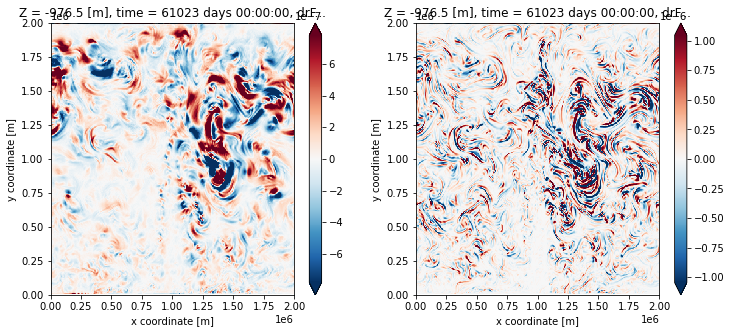

In [156]:
plt.figure(figsize=(12, 5))

plt.subplot(121)
T_flux_div.isel(time=0).sel(Z=-1000, method='nearest').plot(robust=True)

plt.subplot(122)
C_flux_div.isel(time=0).sel(Z=-1000, method='nearest').plot(robust=True)

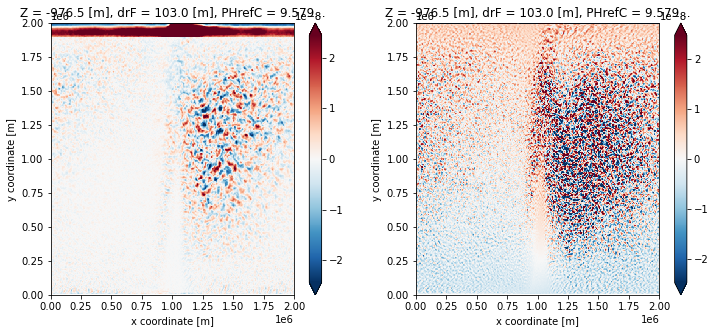

In [157]:
plt.figure(figsize=(12, 5))

plt.subplot(121)
T_flux_div_mean.plot(robust=True)

plt.subplot(122)
C_flux_div_mean.plot(robust=True)

<AxesSubplot:>

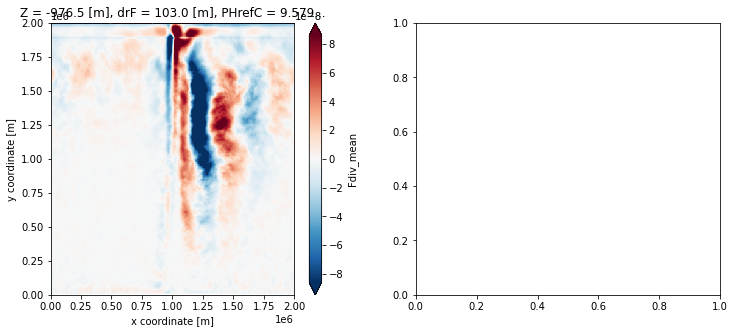

In [254]:
plt.figure(figsize=(12, 5))

plt.subplot(121)
T_mean_flux_div_mean.plot(robust=True)

plt.subplot(122)
#C_flux_div_mean.plot(robust=True)

/home/dbalwada/.conda/envs/GM-Redi-offline-env/lib/python3.9/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/home/dbalwada/.conda/envs/GM-Redi-offline-env/lib/python3.9/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/home/dbalwada/.conda/envs/GM-Redi-offline-env/lib/python3.9/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))


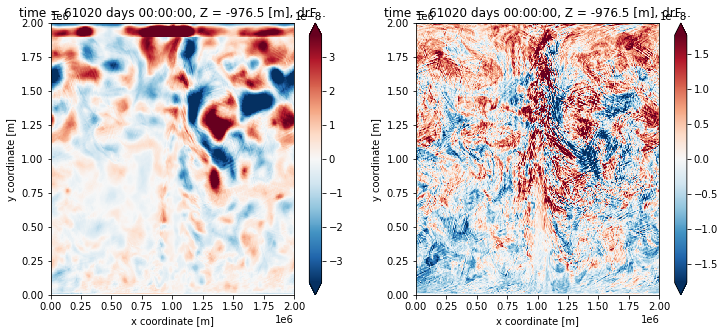

In [233]:
plt.figure(figsize=(12, 5))

plt.subplot(121)
Ttave_flux_div.isel(time=-1).sel(Z=-1000, method='nearest').plot(robust=True)

plt.subplot(122)
Ctave_flux_div.isel(time=-1).sel(Z=-1000, method='nearest').plot(robust=True)

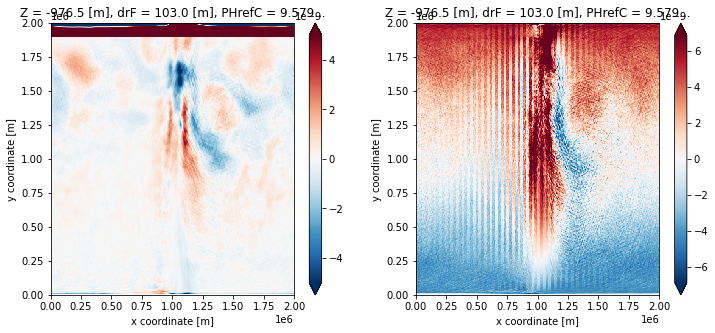

In [231]:
plt.figure(figsize=(12, 5))

plt.subplot(121)
Ttave_flux_div_mean.plot(vmin=-5e-9)

plt.subplot(122)
Ctave_flux_div_mean.plot(robust=True)

<AxesSubplot:>

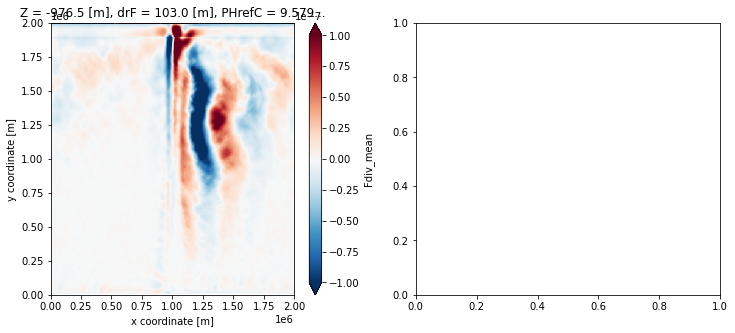

In [246]:
plt.figure(figsize=(12, 5))

plt.subplot(121)
Ttave_mean_flux_div_mean.plot(vmin=-1e-7)

plt.subplot(122)
#Ctave_flux_div_mean.plot(robust=True)

/home/dbalwada/.conda/envs/GM-Redi-offline-env/lib/python3.9/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))


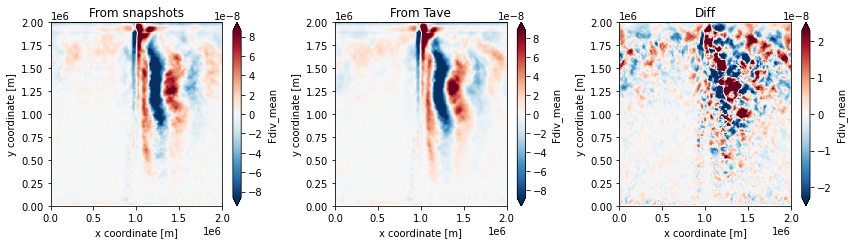

In [265]:
plt.figure(figsize=(12, 3.5))

plt.subplot(131)
T_mean_flux_div_mean.plot(robust=True)
plt.title('From snapshots')

plt.subplot(132)
Ttave_mean_flux_div_mean.plot(robust=True)
plt.title('From Tave')

plt.subplot(133)
(Ttave_mean_flux_div_mean - T_mean_flux_div_mean).plot(robust=True)
plt.title('Diff')
plt.tight_layout()

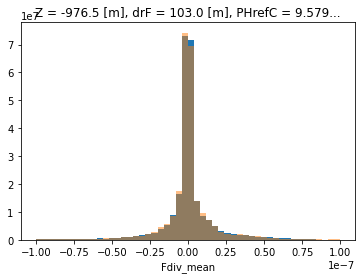

In [264]:
bins = np.linspace(-1e-7, 1e-7, 51 )
T_mean_flux_div_mean.sel(YC=slice(100e3,1900e3)).plot.hist(bins=bins, density=True);
Ttave_mean_flux_div_mean.sel(YC=slice(100e3,1900e3)).plot.hist(bins=bins, alpha=0.5, density=True);
#(T_mean_flux_div_mean - Ttave_mean_flux_div_mean).sel(YC=slice(100e3,1900e3)).plot.hist(bins=bins, alpha=0.5, density=True);


/home/dbalwada/.conda/envs/GM-Redi-offline-env/lib/python3.9/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/home/dbalwada/.conda/envs/GM-Redi-offline-env/lib/python3.9/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/tmp/ipykernel_72983/3018667901.py:6: MatplotlibDeprecationWarning: The 'linthreshy' parameter of __init__() has been renamed 'linthresh' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  plt.yscale('symlog', linthreshy=1e-9)


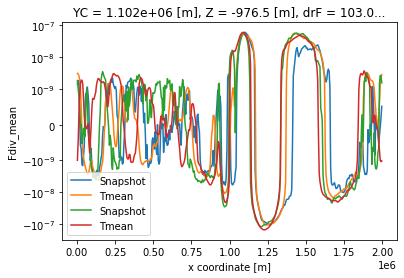

In [277]:

T_mean_flux_div_mean.sel(YC=1000e3, method='nearest').plot(label='Snapshot')
Ttave_mean_flux_div_mean.sel(YC=1000e3, method='nearest').plot(label='Tmean')
T_mean_flux_div_mean.sel(YC=1100e3, method='nearest').plot(label='Snapshot')
Ttave_mean_flux_div_mean.sel(YC=1100e3, method='nearest').plot(label='Tmean')
plt.legend()
plt.yscale('symlog', linthreshy=1e-9)

Notice that there are two differences between the two fields. 
1) The time mean is smoother at small scales than the snapshot field.
2) There is also large scale differences. 

Much of the large scale differences is likely due to low freq variability, and the two simulation times being different. 
The small scale structure in the snapshot field is likely due to missing variability at sub 3 day scales. 

In [286]:
T_flux_div_series = T_flux_div.sel(XC=1500e3, YC=1100e3, Z=-1000, method='nearest')
T_flux_div_series.load();
C_flux_div_series = C_flux_div.sel(XC=1500e3, YC=1100e3, Z=-1000, method='nearest')
C_flux_div_series.load();

In [287]:
Ttave_flux_div_series = Ttave_flux['Fdiv'].sel(XC=1500e3, YC=1100e3, Z=-1000, method='nearest')

/home/dbalwada/.conda/envs/GM-Redi-offline-env/lib/python3.9/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/home/dbalwada/.conda/envs/GM-Redi-offline-env/lib/python3.9/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/tmp/ipykernel_72983/3924262744.py:6: MatplotlibDeprecationWarning: The 'linthreshy' parameter of __init__() has been renamed 'linthresh' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  plt.yscale('symlog', linthreshy=1e-10)
/home/dbalwada/.conda/envs/GM-Redi-offline-env/lib/python3.9/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/home/dbalwada/.conda/envs/GM-Redi-offline-env/lib/python3.9/site-packages/dask/core.py:119: RuntimeWarning: divi

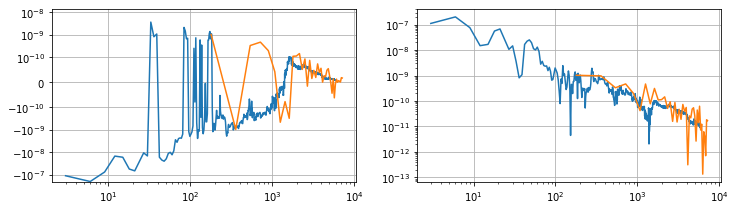

In [288]:
plt.figure(figsize=(12, 7))
plt.subplot(221)
plt.plot(time , (T_flux_div_series.cumsum()*3)/ time.cumsum() ) 
plt.plot(time_tav, (Ttave_flux_div_series.cumsum()*180)/ time_tav.cumsum() )
plt.xscale('log')
plt.yscale('symlog', linthreshy=1e-10)
plt.grid()

plt.subplot(222)
plt.plot(time , np.abs(T_flux_div_series.cumsum()*3)/ time.cumsum() ) 
plt.plot(time_tav, np.abs(Ttave_flux_div_series.cumsum()*180)/ time_tav.cumsum() )
plt.xscale('log')
plt.yscale('log')
plt.grid()

/home/dbalwada/.conda/envs/GM-Redi-offline-env/lib/python3.9/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/home/dbalwada/.conda/envs/GM-Redi-offline-env/lib/python3.9/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))


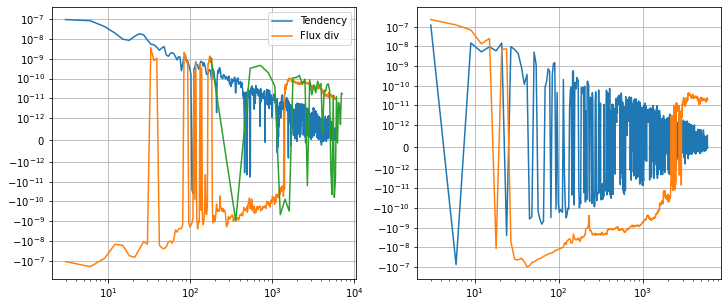

In [289]:
plt.figure(figsize=(12, 5))

plt.subplot(121)
plt.plot(time , (T_series - T_series[0])/ time.cumsum()/24/3600 , label='Tendency') 
plt.plot(time , (T_flux_div_series.cumsum()*3)/ time.cumsum() , label='Flux div') 
plt.plot(time_tav, (Ttave_flux_div_series.cumsum()*180)/ time_tav.cumsum() )

#plt.plot(time [1:] , dT_dt.cumsum()*3. / time[1:].cumsum()/24/3600 ) 
plt.yscale('symlog', linthresh=1e-12)
plt.legend()
plt.xscale('log')
plt.grid()

plt.subplot(122)
plt.plot(time , (C_series - C_series[0])/ time.cumsum()/24/3600 ) 
plt.plot(time , (C_flux_div_series.cumsum()*3)/ time.cumsum() ) 

#plt.plot(time [1:] , dC_dt.cumsum()*3. / time[1:].cumsum()/24/3600 ) 
plt.yscale('symlog', linthresh=1e-12)
plt.xscale('log')
plt.grid()
